# Benchmark the results cmopared with other methods

In [2]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

import scipy.io

In [3]:
# github_dir = '/home/dingshandeng/github/ysoisochrone/'
github_dir = '/Users/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))
import ysoisochrone.utils as utils
import ysoisochrone

## Compare the estimates posted on Manara et al. 2021

In [4]:
file_dir_t = os.path.join(github_dir, 'tests', 'data')
df_M2023 = pd.read_table(os.path.join(file_dir_t, 'PP7-Surveys_2022-10-19_PPVII_website.tsv'))

In [5]:
# Exclude those do not have Teff and Lstar
df_prop = df_M2023[[True if num != '--' else False for num in df_M2023['Teff_xs']]]
df_prop.index = np.arange(len(df_prop))
df_prop.loc[:, ['Teff_xs', 'Lstar_xs']]

,Teff_xs,Lstar_xs
0,4060,0.89
1,3415,0.22
2,3125,0.02
3,3060,0.06
4,4900,5.42
...,...,...
544,3900,9.332543008
545,7200,28.84031503
546,10500,295.1209227
547,3190,0.5248074602


In [6]:
# df_prop.loc[:, 'Teff'] = np.array([np.float(num) for num in df_prop.loc[:, 'Teff_xs'].values])
df_prop.loc[:, 'Teff'] = np.array([np.float(num) for num in df_prop.loc[:, 'Teff_HH14'].values])
df_prop.loc[:, 'Luminosity'] = np.array([np.float(num) for num in df_prop.loc[:, 'Lstar_xs'].values])
# df_prop.loc[:, 'Luminosity'] = np.array([np.float(num) for num in df_prop.loc[:, 'Lstar_xs_DR3'].values])

/var/folders/55/fr_v0r1j7q33r0fj9pyy5xfw0000gn/T/ipykernel_33532/1562192983.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_prop.loc[:, 'Teff'] = np.array([np.float(num) for num in df_prop.loc[:, 'Teff_HH14'].values])
/Users/dingshandeng/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/var/folders/55/fr_v0r1j7q33r0fj9pyy5xfw0

In [20]:
# best_logmass_output, best_logage_output = ysoisochrone.bayesian.derive_stellar_mass_age_closest_track(df_prop, model='Baraffe_n_Feiden', verbose=False)

# best_logmass_output, best_logage_output = ysoisochrone.bayesian.derive_stellar_mass_age_closest_track(df_prop, model='Baraffe2015', verbose=False)

best_logmass_output, best_logage_output = ysoisochrone.bayesian.derive_stellar_mass_age_closest_track(df_prop, model='Feiden2016', verbose=False)

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/bayesian.py:363: RuntimeWarning: divide by zero encountered in log10
  c_logL = np.log10(L_this)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/bayesian.py:364: RuntimeWarning: invalid value encountered in log10
  c_logT = np.log10(T_this)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/bayesian.py:363: RuntimeWarning: invalid value encountered in log10
  c_logL = np.log10(L_this)


In [21]:
df_output_mass = pd.DataFrame(np.array(best_logmass_output), columns=['logmass[msolar]'])
df_output_age = pd.DataFrame(np.array(best_logage_output), columns=['logage[yrs]']) 
df_output = pd.concat([df_prop, df_output_mass, df_output_age], axis=1)

df_output.loc[:, 'masses[msolar]'] = 10**df_output.loc[:, 'logmass[msolar]'].values

df_output.loc[:, 'age[Myrs]'] = 10**df_output.loc[:, 'logage[yrs]']/1e6

In [22]:
df_output['M2023_logmass[msolar]'] = np.log10(df_prop['Mstar_PPVII'].values)

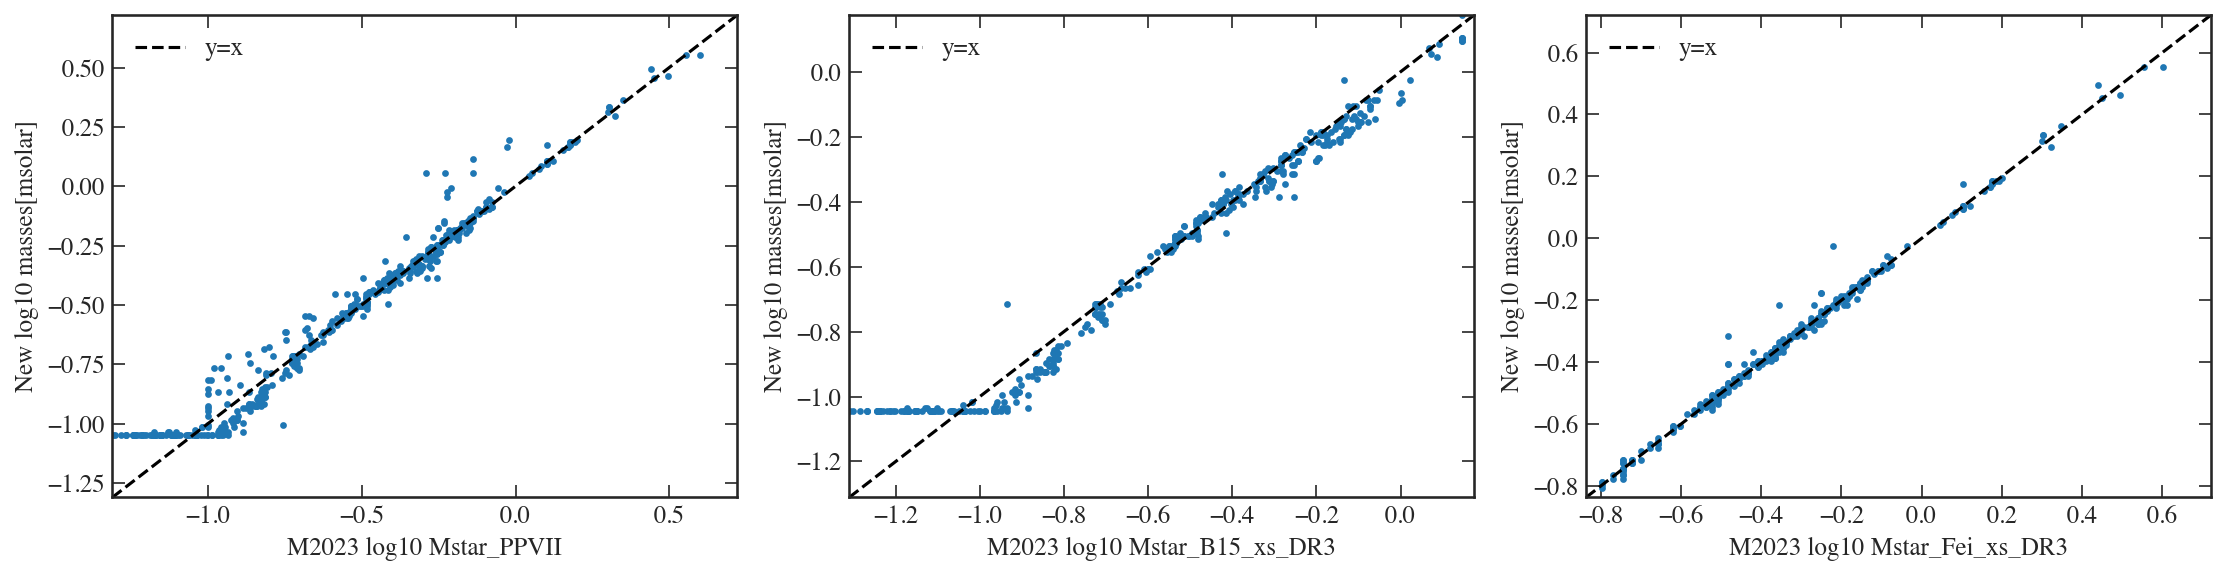

In [23]:
fig = plt.figure(dpi=150, figsize=(15, 4))

for column_t, column_x_t, i_plot in zip(
    ['masses[msolar]', 'masses[msolar]', 'masses[msolar]'],
    ['Mstar_PPVII', 'Mstar_B15_xs_DR3', 'Mstar_Fei_xs_DR3'],
    [1, 2, 3]):
    
    ax = fig.add_subplot(1,3,i_plot)
    ax.set_xlabel('M2023 log10 %s'%(column_x_t))
    ax.set_ylabel('New log10 %s'%(column_t))

    xt = np.log10(df_output['%s'%(column_x_t)].values)
    yt = np.log10(df_output['%s'%(column_t)].values)
    ax.scatter(xt, yt, s=5)

    if 'mass' in column_t:
        line = np.linspace(0.8*np.nanmin(xt), 1.2*np.nanmax(xt), 100)
    elif column_t == 'logage[yrs]':
        line = np.linspace(1.0*np.nanmin(xt), 1.0*np.nanmax(xt), 100)
    else:
        xt_t = xt.copy()
        xt_t[xt_t < 1e-5] = np.nan
        line = np.linspace(1.0*np.nanmin(xt_t), 1.0*np.nanmax(xt_t), 100)
    ax.plot(line, line, c='k', linestyle='--', label='y=x')
    # ax.plot(line, line*10, c='C1', linestyle='-.', label='y=10x')
    # ax.plot(line, line*0.1, c='C2', linestyle='-.', label='y=0.1x')

    ax.set_xlim(np.min(line), np.max(line))
    ax.set_ylim(ax.get_xlim())

    ax.legend()
    
fig.tight_layout()
plt.show()

In [24]:
err_Teff = utils.assign_unc_teff(df_output['Teff'].values)
err_Lumi = utils.assign_unc_lumi(df_output['Luminosity'].values)
df_output['e_Teff'] = err_Teff
df_output['e_Luminosity'] = err_Lumi

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/utils.py:77: RuntimeWarning: invalid value encountered in log10
  err_teff_ar[ii] = unc_linear_from_log(np.log10(T_this), sigma_logT)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/utils.py:102: RuntimeWarning: divide by zero encountered in log10
  err_lumi_ar[ii] = unc_linear_from_log(np.log10(L_this), sigma_logL)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/utils.py:102: RuntimeWarning: invalid value encountered in log10
  err_lumi_ar[ii] = unc_linear_from_log(np.log10(L_this), sigma_logL)


In [25]:
# test_columns = ['Mstar_PPVII', 'Mstar_B15_xs_DR3', 'Mstar_Fei_xs_DR3']
# test_columns = ['Mstar_B15_xs_DR3']
test_columns = ['Mstar_Fei_xs_DR3']

column_t = 'masses[msolar]'

logi_all = np.zeros(len(df_output))
for column_x_t in test_columns:
    # column_t = 'logage[yrs]'
    xt = np.log10(df_output['%s'%(column_x_t)].values)
    yt = np.log10(df_output['%s'%(column_t)].values)
    logi_t = (np.abs(xt - yt)/np.abs(xt) > 0.2)
    logi_all = np.logical_or(logi_all, logi_t)

# yt/xt > 1.05
# np.nanmax(yt/xt)
# df_problematic = df_output[yt-xt > 0.05]
print('total number of targets: ', len(df_output))
df_problematic = df_output[logi_all]
print('number of target that has differences:', len(df_problematic))

total number of targets:  549
number of target that has differences: 10


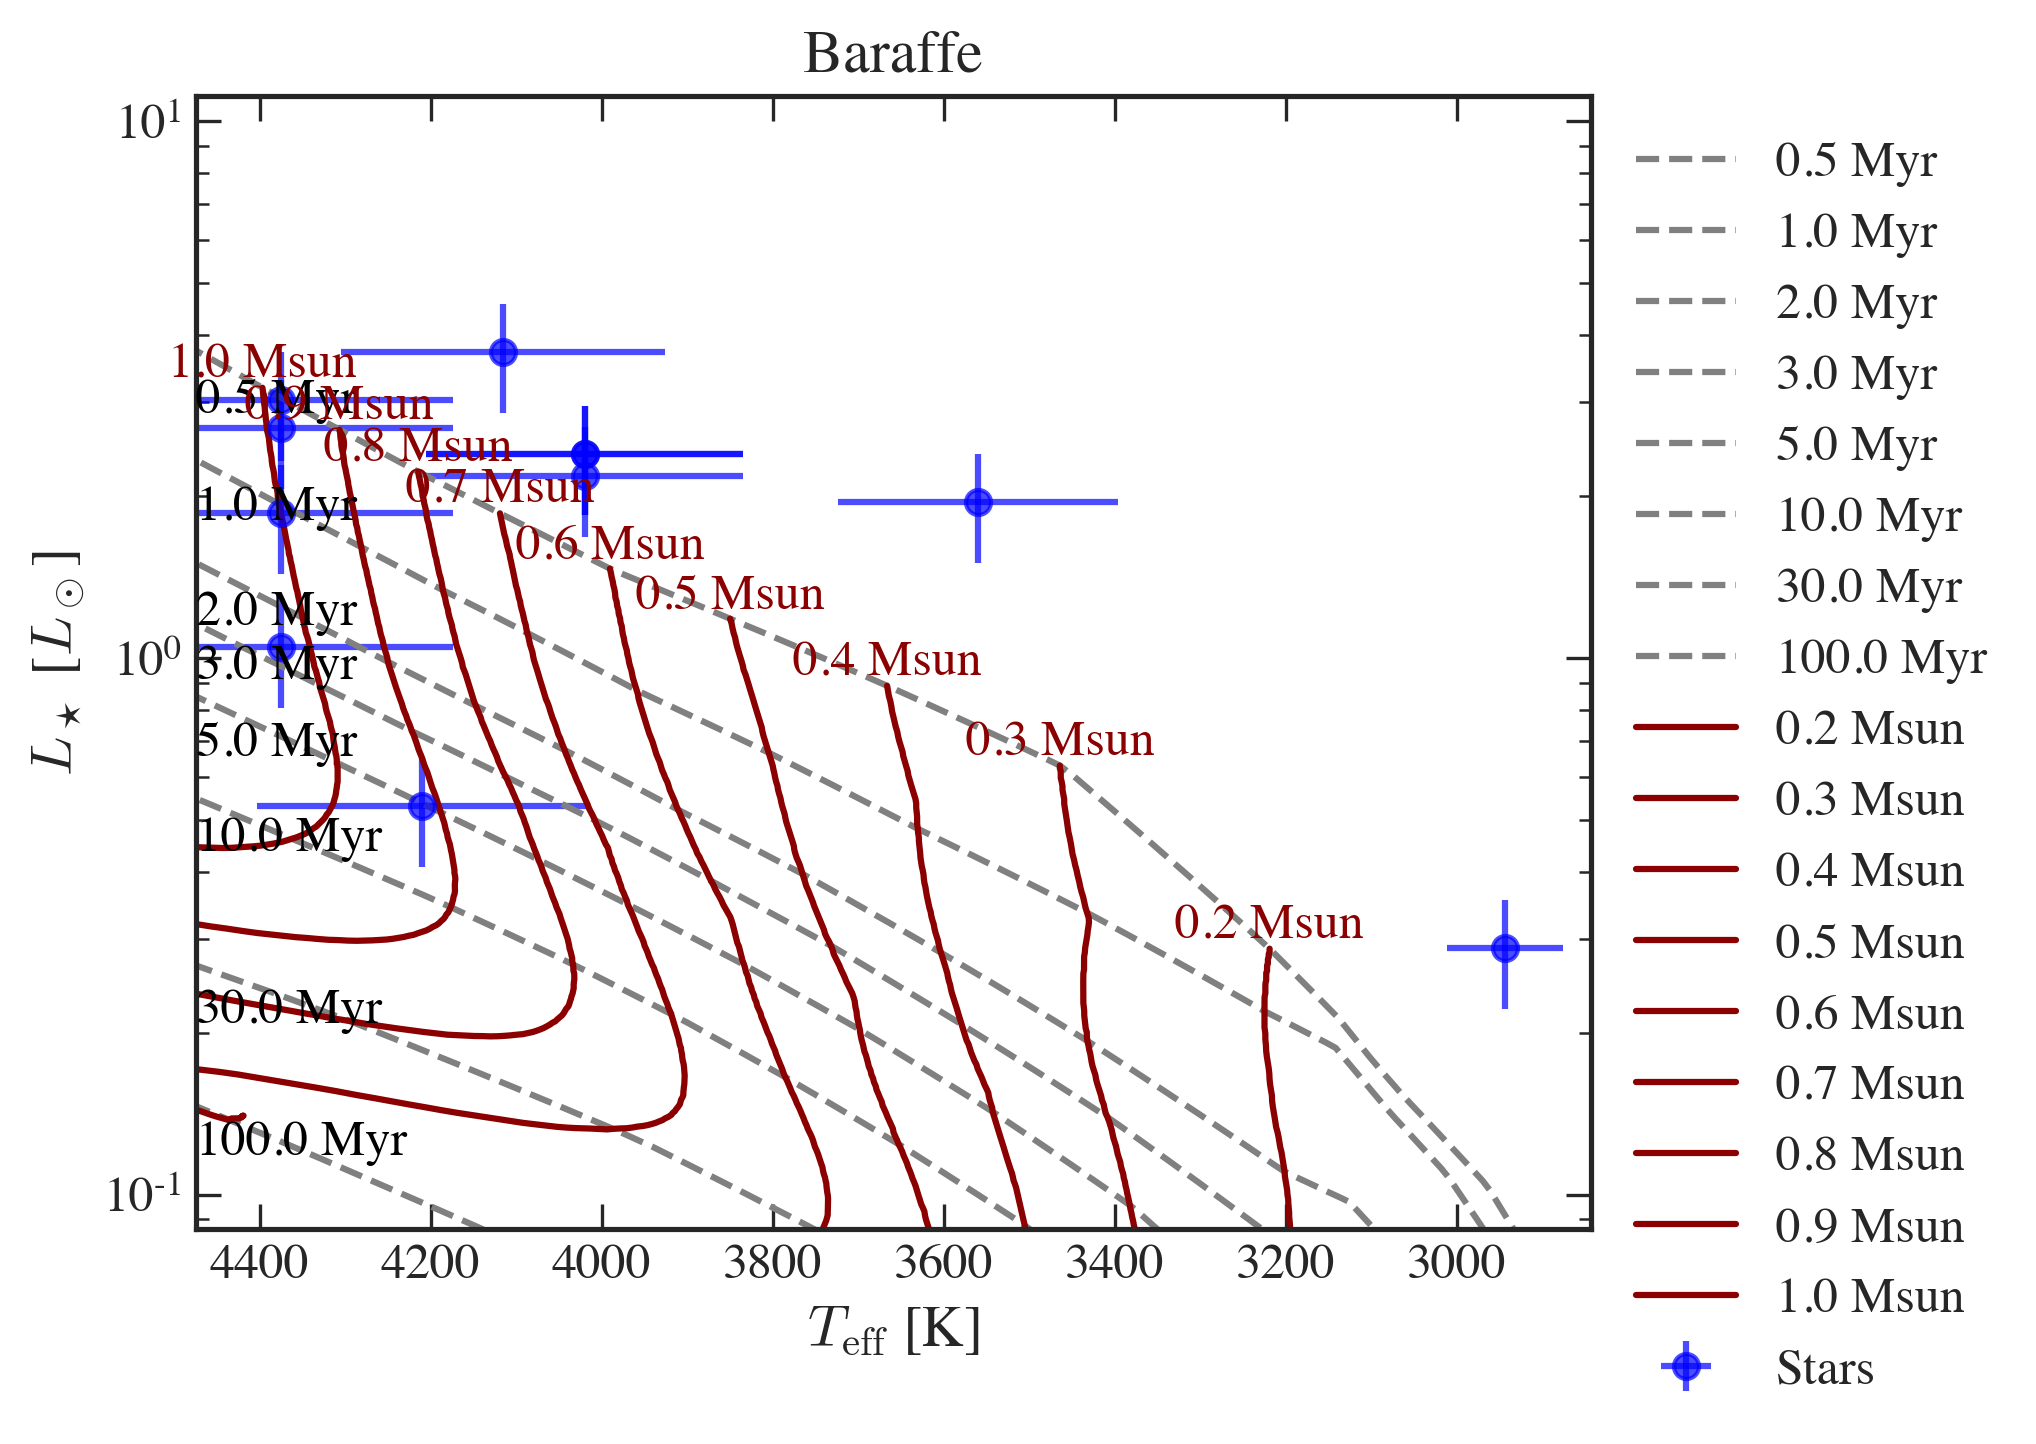

In [19]:
ylim_set_t = [0.05, 500]

isochrone = ysoisochrone.isochrone.Isochrone()

fig, ax = plt.subplots(1,1,figsize=(6, 5))

# isochrone.set_tracks('Feiden2016')
isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=ax, ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6]) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

ax.set_title('Baraffe')
# ax.legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

plt.show()

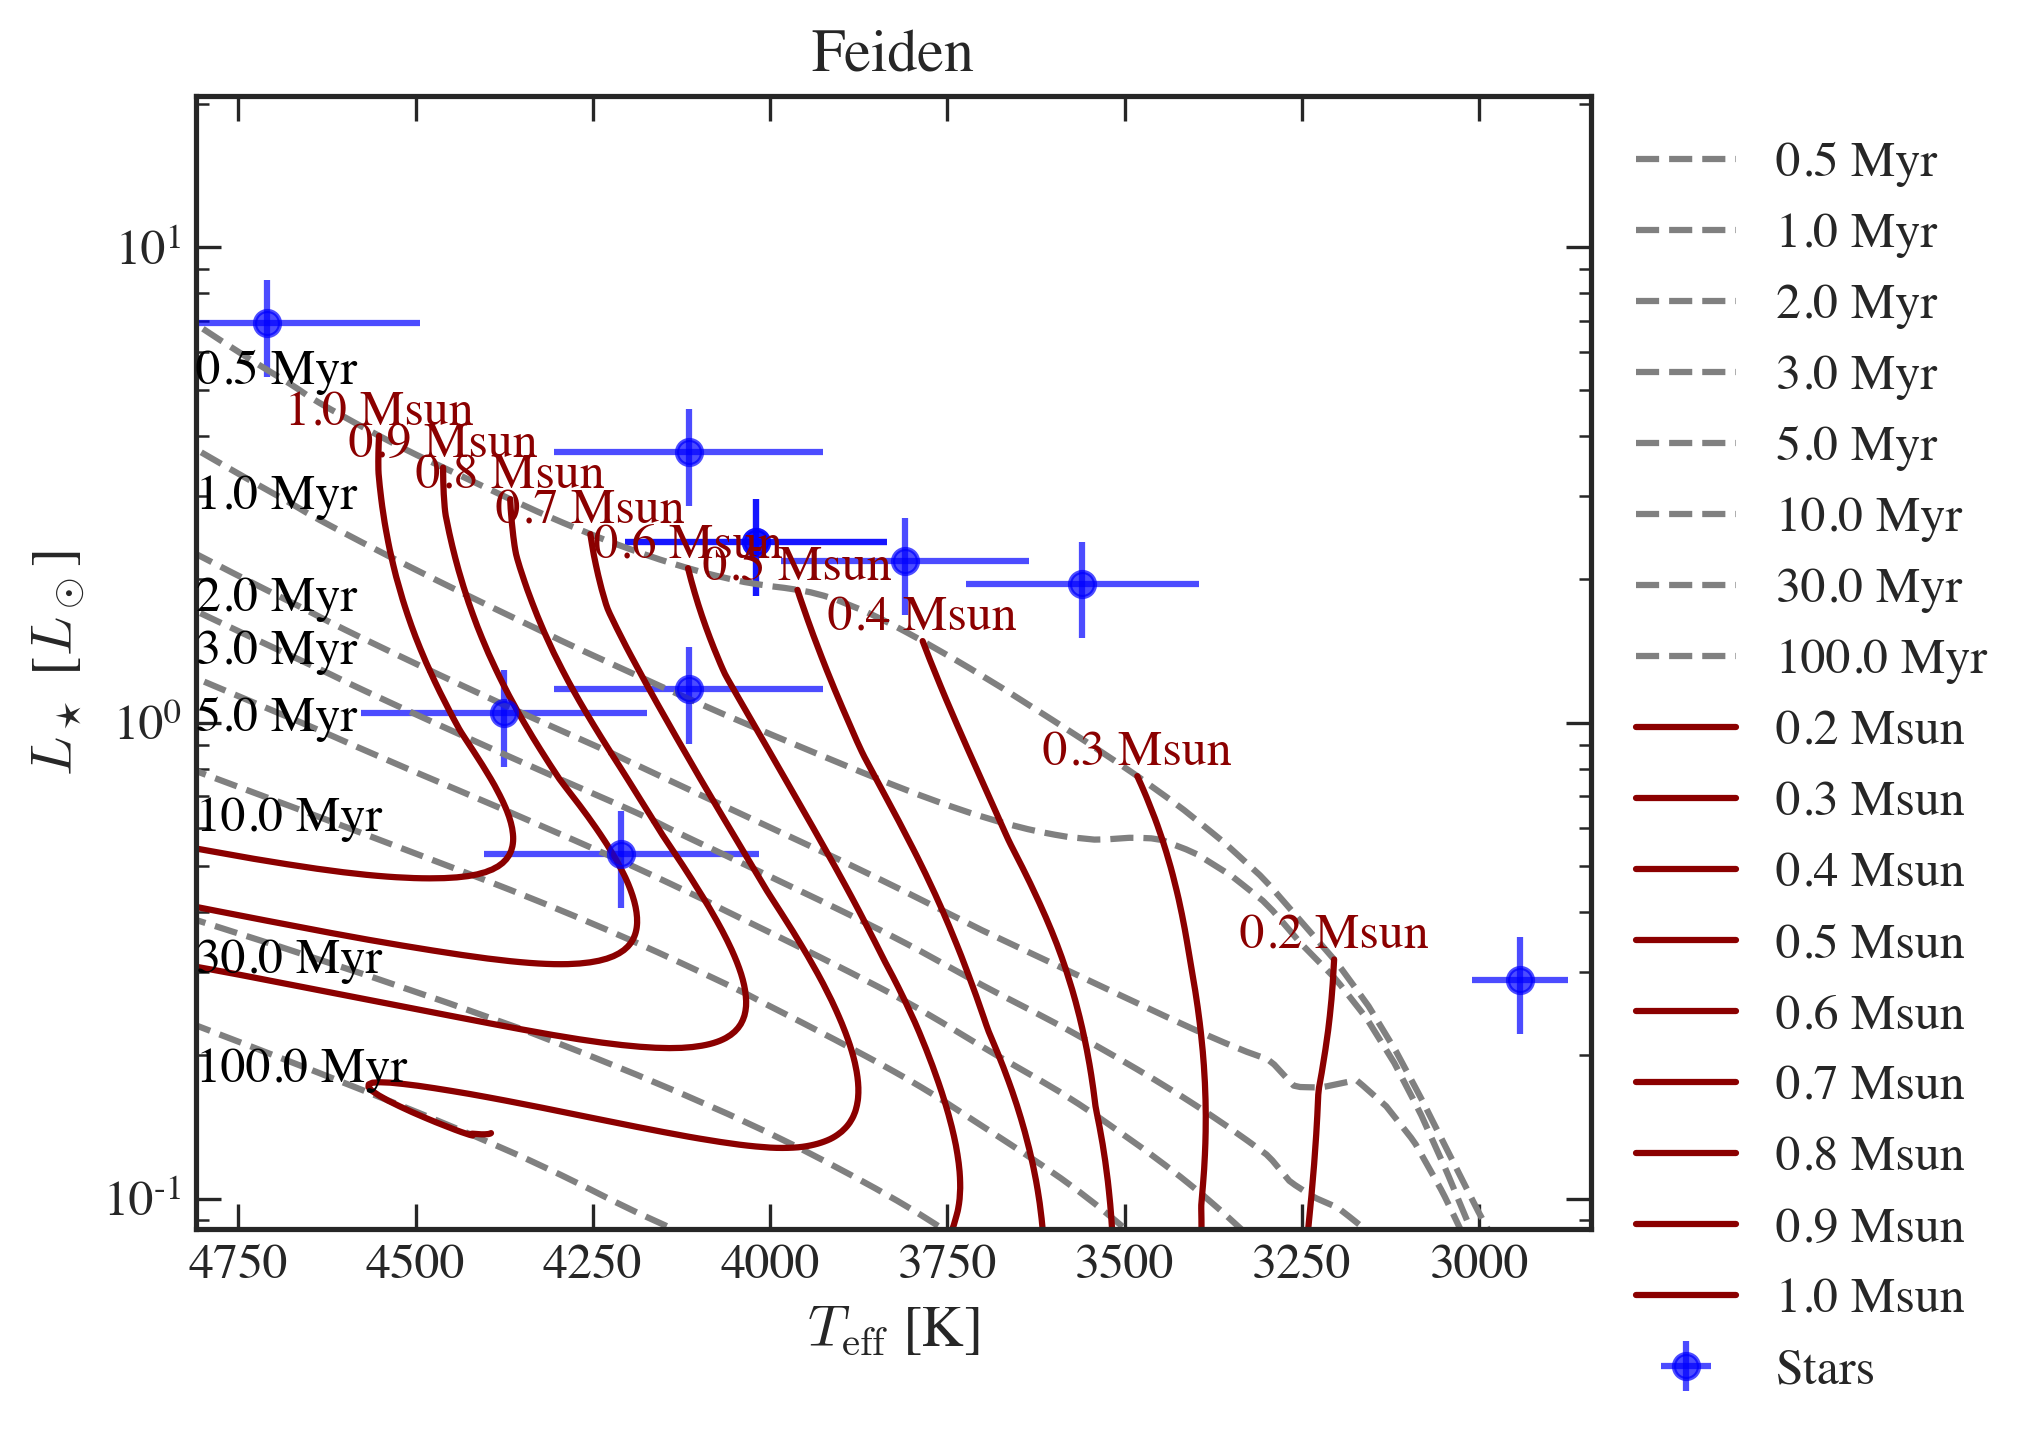

In [26]:
ylim_set_t = [0.05, 500]

isochrone = ysoisochrone.isochrone.Isochrone()

fig, ax = plt.subplots(1,1,figsize=(6, 5))

isochrone.set_tracks('Feiden2016')
# isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=ax, ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6]) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

ax.set_title('Feiden')
# ax.legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

plt.show()

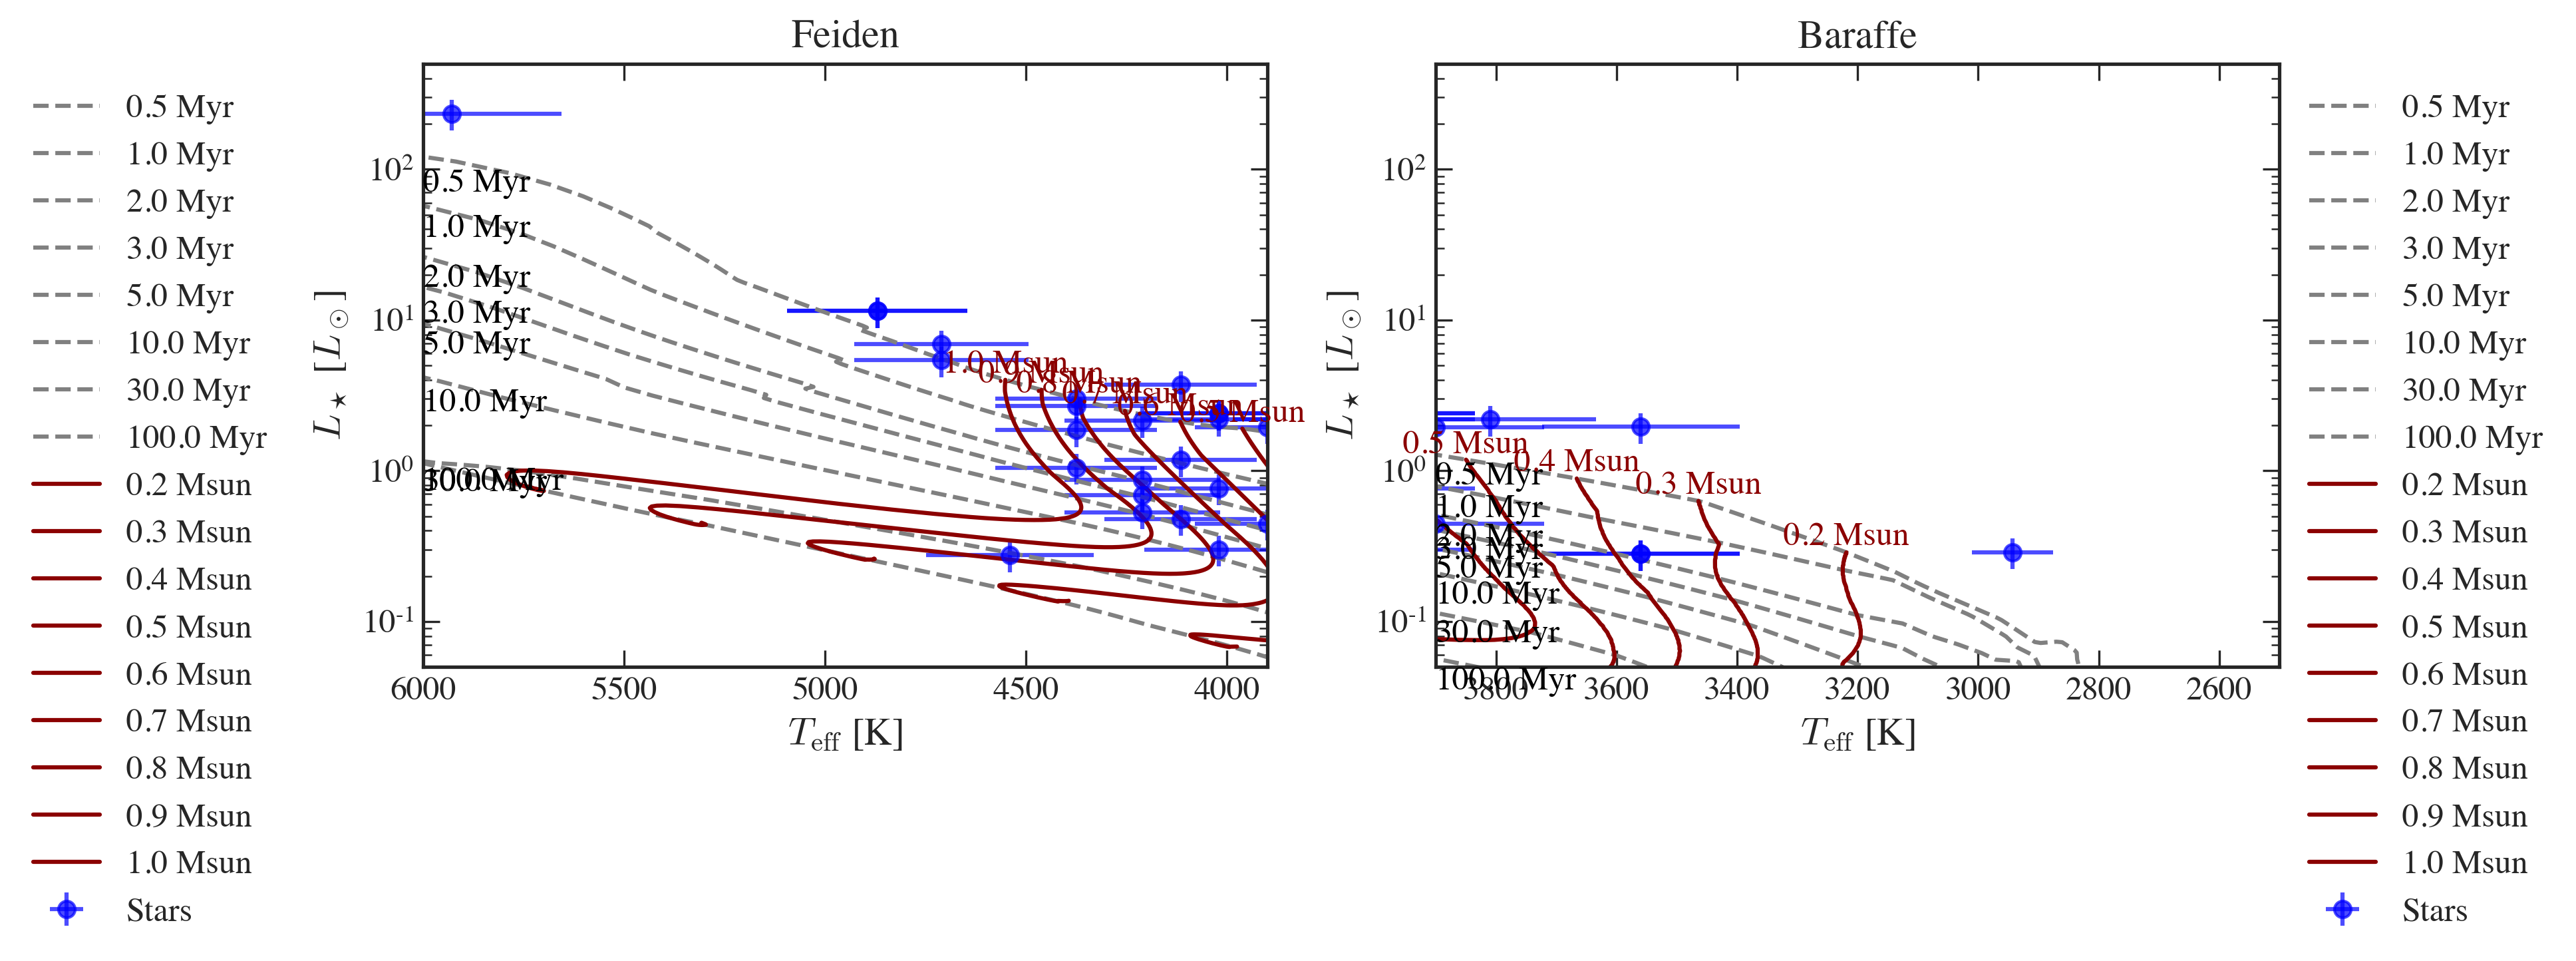

In [25]:
ylim_set_t = [0.05, 500]

isochrone = ysoisochrone.isochrone.Isochrone()

fig, axes = plt.subplots(1,2,figsize=(12, 4))

isochrone.set_tracks('Feiden2016')
# isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=axes[0], ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], xlim_set=[6000, 3900], ylim_set=ylim_set_t) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

axes[0].set_title('Feiden')
axes[0].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=axes[1], ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], xlim_set=[3900, 2500], ylim_set=ylim_set_t) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) 

axes[1].set_title('Baraffe')
# axes[0].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

plt.show()